In [8]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = pd.read_csv("Desktop\heart.csv")  
import pandas as pd  

df.head(10) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
df.shape

(918, 12)

In [16]:
df = df.dropna()

In [17]:
df.shape

(918, 12)

In [4]:
df = df.loc[~((df['Age'] == 0) | (df['Cholesterol'] == 0) | (df['RestingBP'] == 0))]

In [21]:
df.shape

(746, 12)

In [10]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Text(0.5, 1.0, 'Scatter plot on Heart Failure Prediction dataset')

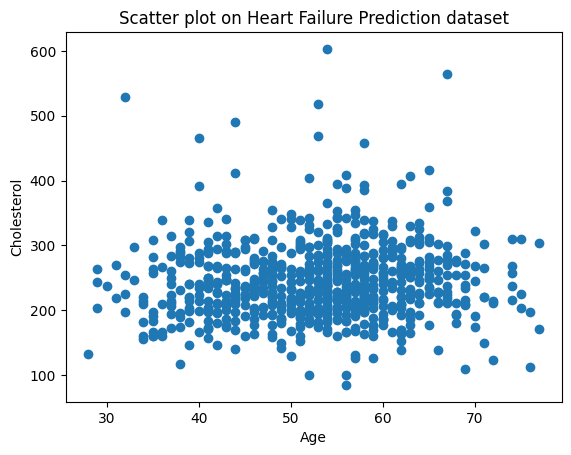

In [5]:
plt.scatter(df['Age'],df['Cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter plot on Heart Failure Prediction dataset')

<AxesSubplot:xlabel='RestingBP'>

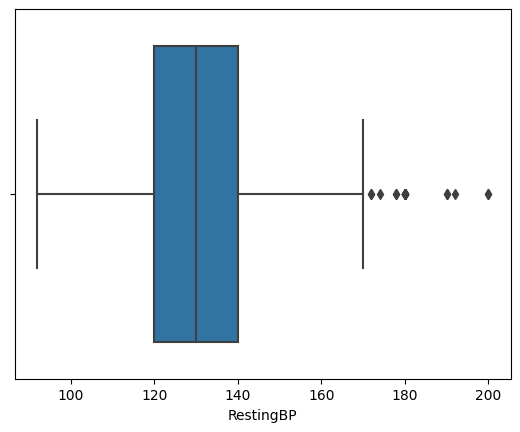

In [6]:
sns.boxplot(x = df['RestingBP'])

In [13]:
df1 = df.loc[:,(df.dtypes == 'int64').values]
df1.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,40,140,289,0,172,0
1,49,160,180,0,156,1
2,37,130,283,0,98,0
3,48,138,214,0,108,1
4,54,150,195,0,122,0
5,39,120,339,0,170,0
6,45,130,237,0,170,0
7,54,110,208,0,142,0
8,37,140,207,0,130,1
9,48,120,284,0,120,0


In [15]:
z = np.abs(stats.zscore(df1))
z

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,1.433140,0.410909,0.825070,0.551341,1.382928,1.113115
1,0.478484,1.491752,0.171961,0.551341,0.754157,0.898380
2,1.751359,0.129513,0.770188,0.551341,1.525138,1.113115
3,0.584556,0.302825,0.139040,0.551341,1.132156,0.898380
4,0.051881,0.951331,0.034755,0.551341,0.581981,1.113115
...,...,...,...,...,...,...
913,0.902775,1.210356,0.596393,0.551341,0.188999,0.898380
914,1.536902,0.627078,0.053049,1.813758,0.164684,0.898380
915,0.370100,0.129513,0.620168,0.551341,0.857069,0.898380
916,0.370100,0.129513,0.340275,0.551341,1.461525,0.898380


In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Age             13.00
RestingBP       20.00
Cholesterol     93.75
FastingBS        0.00
MaxHR           36.00
Oldpeak          1.50
HeartDisease     1.00
dtype: float64

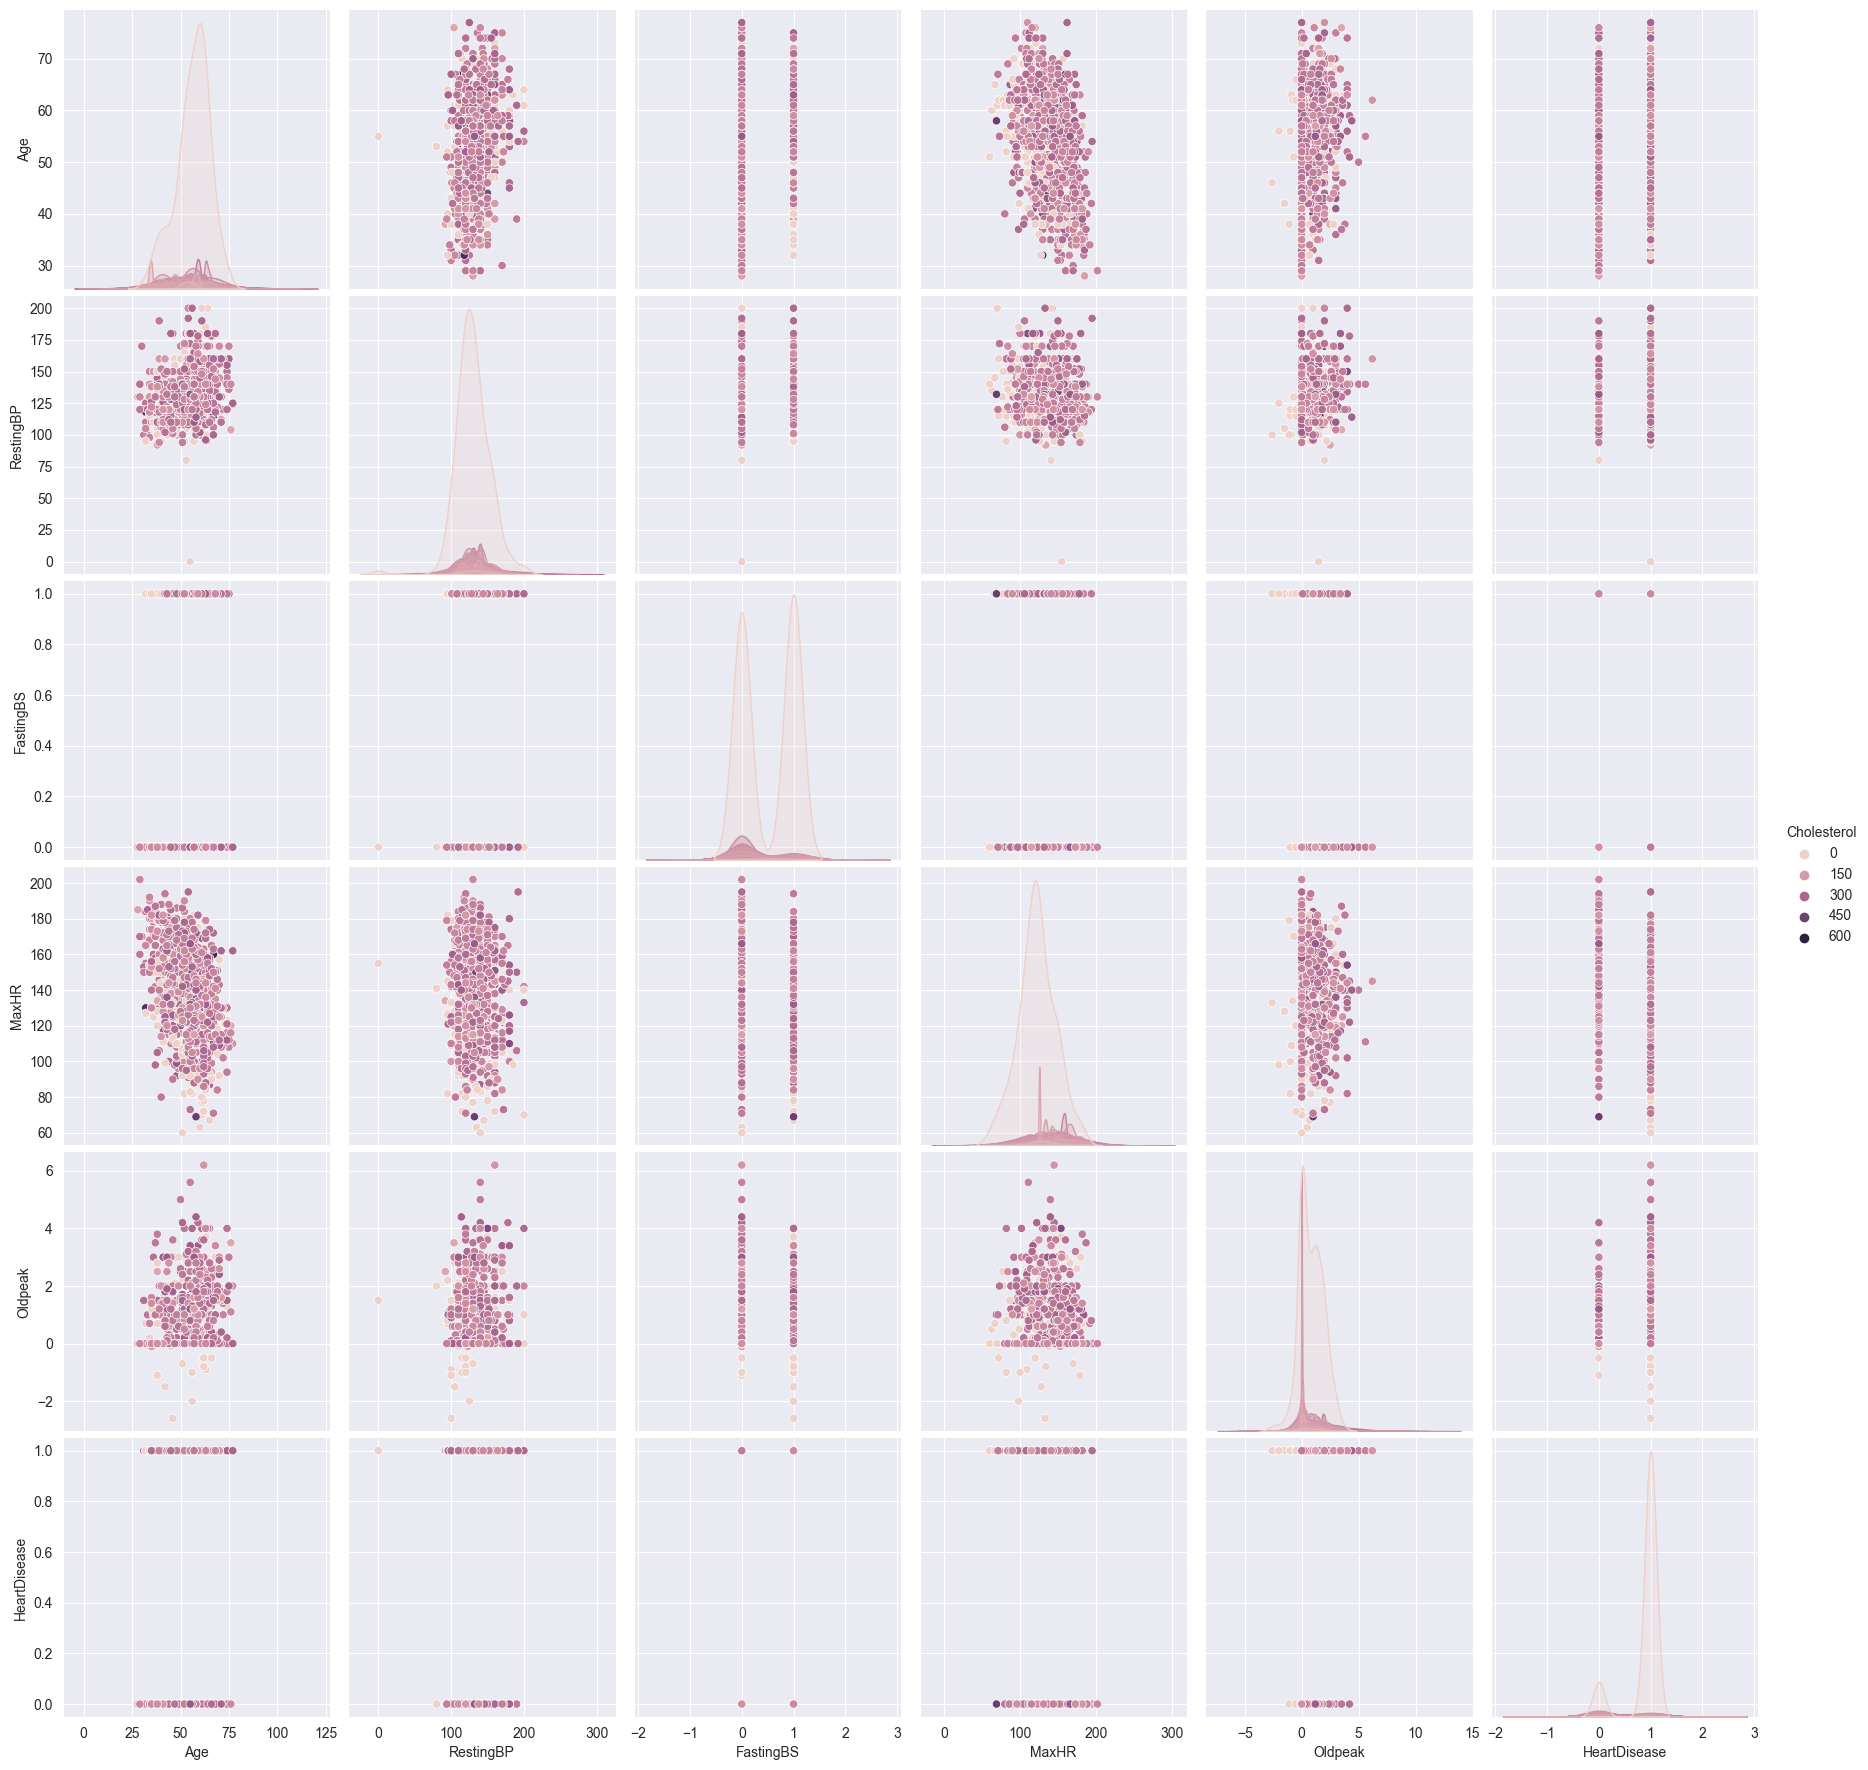

In [25]:
sns.set_style("darkgrid");
sns.pairplot(df, hue = "Cholesterol", height = 3);
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

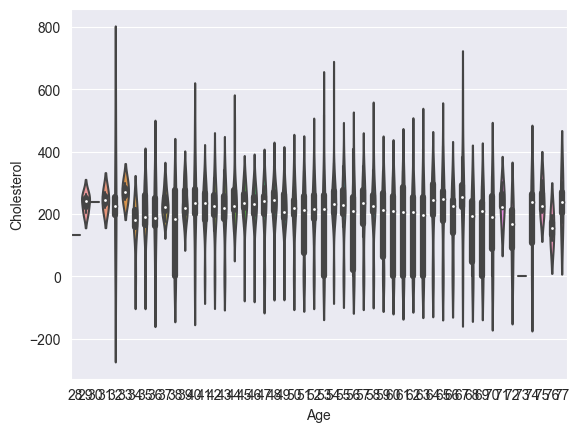

In [26]:
sns.violinplot(x = 'Age',y = 'Cholesterol',data = df, size = 6)

C:\Users\cse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'M'

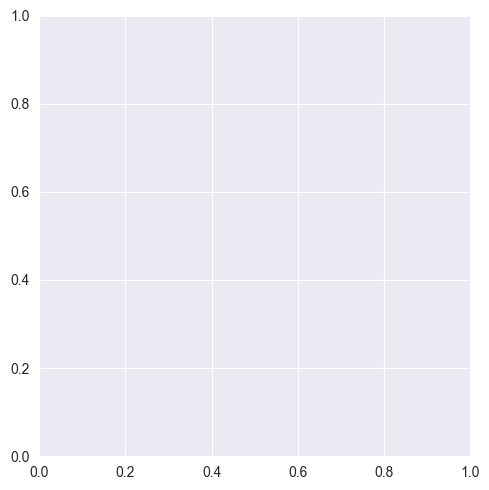

In [29]:
sns.FacetGrid(df, hue='Cholesterol',height = 5).map(sns.distplot,'Sex').add_legend()